<a href="https://colab.research.google.com/github/moridin04/CCDEPLRL_EXERCISES_COM222ML/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the libraries

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [54]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [55]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "drive/MyDrive/Test/exercise4_fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "drive/MyDrive/Test/exercise4_fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "drive/MyDrive/Test/exercise4_fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 564 files belonging to 4 classes.
Found 76 files belonging to 4 classes.
Found 148 files belonging to 4 classes.


Display sample images from the dataset

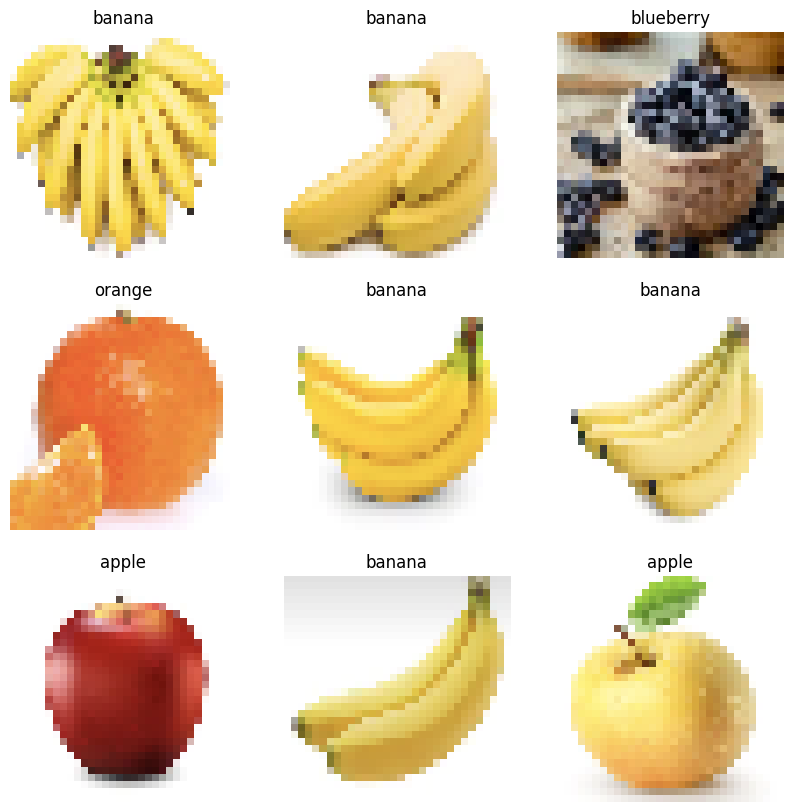

In [56]:
class_names = ["apple", "banana", "blueberry", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [57]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 4, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)


Define the optimizer and loss function

In [58]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

Train the model

In [59]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 226ms/step - accuracy: 0.3526 - loss: 1.2926 - val_accuracy: 0.5789 - val_loss: 0.8502
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.6813 - loss: 0.7435 - val_accuracy: 0.6842 - val_loss: 0.6441
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.7555 - loss: 0.5572 - val_accuracy: 0.7895 - val_loss: 0.4493
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.8485 - loss: 0.3748 - val_accuracy: 0.8158 - val_loss: 0.3135
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9138 - loss: 0.2632 - val_accuracy: 0.8816 - val_loss: 0.2622
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.8834 - loss: 0.2901 - val_accuracy: 0.8553 - val_loss: 0.3957
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9342 - loss: 0.2014 - val_accuracy: 0.9474 - val_loss: 0.1503
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9595 - loss: 0.1288 - val_accuracy: 0.

Test the model

In [60]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9118 - loss: 0.1735


[0.14253340661525726, 0.9459459185600281]

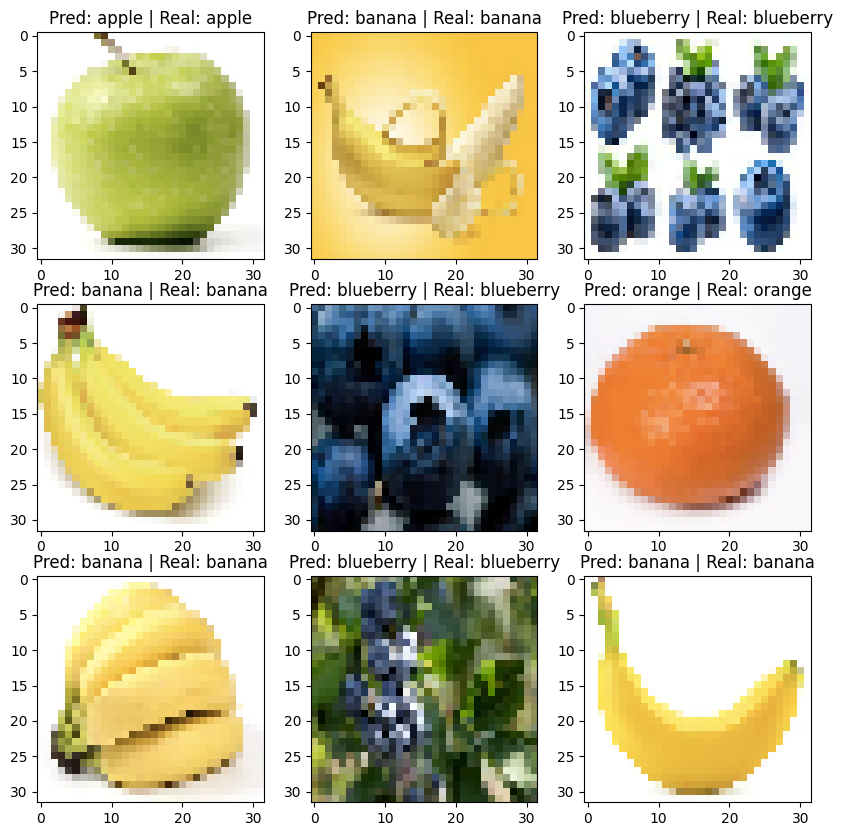

In [61]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [62]:
model.save('fruitmodel.keras')